In [1]:
import numpy as np
import plotly.graph_objects


In [2]:
mydefault = plotly.graph_objects.layout.Template()
mydefault.layout.hovermode = False
mydefault.layout.scene.hovermode = False
mydefault.layout.xaxis.showspikes = False
mydefault.layout.yaxis.showspikes = False
mydefault.layout.scene.xaxis.showspikes = False
mydefault.layout.scene.yaxis.showspikes = False
mydefault.layout.scene.zaxis.showspikes = False
plotly.io.templates["mydefault"] = mydefault
plotly.io.templates.default = "mydefault"


**Question:** What sorts of long-term behavior can you possibly get from a single-variable *ordinary* differential equation? 

<span style="font-size: 75%">(That is, from an ODE, *not* a delay differential equation.)</span>


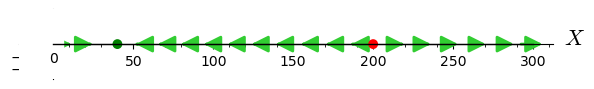

In [3]:
vectorfield(X) = 0.02*(X/40 - 1)*(X/200 - 1)
df = diff(vectorfield, X)
xmin, xmax = 0, 300
plotpoints = 20
eqpts = [expr.rhs() for expr in solve(vectorfield, X)]

delta_x = (xmax - xmin) / plotpoints
x_values = srange(xmin + delta_x/2, xmax, delta_x)
vectors = [vectorfield(X0) for X0 in x_values]
maxsize = max([abs(vec) for vec in vectors])
p = plot(0, (X, xmin, xmax), color="black", zorder=10)
p += line([(-delta_x,-1.4), (-delta_x,1.4)], color="white", thickness=50, zorder=5)
if xmin <= 0 <= xmax:
    p += text("0", (0, -0.6), color="black", zorder=10)
for X0, vec in zip(x_values, vectors):
    if min([abs(X0 - eqpt) for eqpt in eqpts]) < delta_x / 5:
        continue
    vec = vector((vec / maxsize * delta_x * 0.9, 0))
    p += plot(vec, start=(X0,0), color="limegreen")
for eqpt in eqpts:
    stability = df(eqpt)
    color = "green" if stability < 0 else "red" if stability > 0 else "orange"
    p += point([(eqpt, 0)], color=color, size=50, zorder=10)
p.show(aspect_ratio=(xmax - xmin)/20, axes_labels=("$X$", ""))


**Question:** What sorts of long-term behavior can you possibly get from a single-variable *ordinary* differential equation? 

**Answer:**
- Constant (start on an equilibrium point, stay there forever)
- Approach a stable equilibrium point
- Grow without bound (increase to $\infty$ or decrease to $-\infty$)


**Question:** What sorts of long-term behavior can you possibly have in a 2D system of ordinary differential equations? 

<span style="font-size: 75%">(Again, ODEs, not DDEs.)</span>


In [4]:
state_vars = list(var("X, Y"))
system = (
    1 - Y, 
    2 - X, 
)
field(X, Y) = system
t_range = srange(0, 10, 0.1)
ics = {
    (2, 4): t_range, 
}
p1 = plot_phase_portrait(field, (X, -1, 3), (Y, -1, 3), ics, 
                         eqpt_color="red", nullcline_colors=(None, None), aspect_ratio=1)
p = p1 + text("Constant solution (single point trajectory)", (1, 3.7), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

In [5]:
state_vars = list(var("X, Y"))
system = (
    -X + 0.4*Y, 
    -2*Y - X, 
)
field(X, Y) = system
t_range = srange(0, 100, 0.1)
ics = {
    (2, 2): t_range, 
}
p2 = plot_phase_portrait(field, (X, -3, 3), (Y, -3, 3), ics, 
                         nullcline_colors=(None, None), aspect_ratio=1)
p = p2 + text("Trajectory approaches stable eq. point", (0, 4), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

In [6]:
state_vars = list(var("X, Y"))
system = (
    X - 0.5*Y, 
    2*Y + X, 
)
field(X, Y) = system
t_range = srange(0, 15.55, 0.1)
ics = {
    (0.1, -0.1): t_range, 
}
p3 = plot_phase_portrait(field, (X, -1e9, 1e9), (Y, -1e9, 1e9), ics, 
                         eqpt_color=None, nullcline_colors=(None, None), aspect_ratio=1)
p = p3 + text('Trajectory is unbounded ("goes to infinity")', (0, 1.35E9), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

In [7]:
state_vars = list(var("X, Y"))
system = (
    Y, 
    -X - (Y^3 - 0.1*Y), 
)
field(X, Y) = system
t_range = srange(0, 10, 0.1)
ics = {
    (0.365, 0): t_range, 
}
p4 = plot_phase_portrait(field, (X, -1, 1), (Y, -1, 1), ics, 
                         eqpt_color=None, nullcline_colors=(None, None), aspect_ratio=1)
p = p4 + text("Trajectory is periodic (closed loop orbit)", (0, 1.35), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

In [8]:
state_vars = list(var("X, Y"))
system = (
    Y, 
    -X - (Y^3 - 0.1*Y), 
)
field(X, Y) = system
t_range = srange(0, 100, 0.1)
ics = {
    (1, -0.75): t_range, 
}
p5 = plot_phase_portrait(field, (X, -1, 1), (Y, -1, 1), ics, 
                         eqpt_color=None, nullcline_colors=(None, None), aspect_ratio=1)
solution = desolve_odeint(field, (-1, -0.75), t_range, state_vars)
p5 += list_plot(solution[-200:], plotjoined=True, thickness=3, color="purple")
p = p5 + text("Trajectory approaches a periodic cycle (limit cycle attractor)", (0, 1.35), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

In [9]:
state_vars = list(var("X, Y"))
system = (
    (Y - 0.25*X - 1.5)*(X - 1)*(X - 3), 
    (X - 2)*(Y - 1)*(3 - Y), 
)
field(X, Y) = system
t_range = srange(0, 100, 0.1)
ics = {
    (2.02, 2.02): t_range, 
}
p6 = plot_phase_portrait(field, (X, 0, 4), (Y, 0, 4), ics, 
                         aspect_ratio=1)
p = p6 + text('Multiple saddle points form a "polygon" of other', (2, 4.9), fontsize=12)
p += text('trajectories, and this trajectory is trapped inside!', (2, 4.7), fontsize=12)
p.show(axes_labels=("$X$", "$Y$"), figsize=8.5)


NameError: name 'plot_phase_portrait' is not defined

**These are all of the long-term behaviors that can happen to a trajectory in 2D!** 

(This fact is called the **Poincaré–Bendixson Theorem**.) 


In [10]:
ga = graphics_array(((p1, p2, p3), (p4, p5, p6)))
ga.show(figsize=9)


NameError: name 'p1' is not defined

 # In 3D (and higher dimensions), there's a new kind of behavior that does not fit any of these patterns... 

Consider a food chain, with three species: say grass ($G$), sheep ($S$), and wolves ($W$). 

$$ \begin{cases}
    G' = G \cdot \left( 1 - \frac{G}{3} \right) - 2.5 \frac{G}{1 + G} \cdot S \\
    S' = \frac{2}{3} \left( 2.5 \frac{G}{1 + G} \cdot S \right) - 0.4 S - 0.1 \frac{S}{1 + S} \cdot W \\
    W' = 0.5 \left( 0.1 \frac{S}{1 + S} \cdot W \right) - 0.01 W
\end{cases} $$


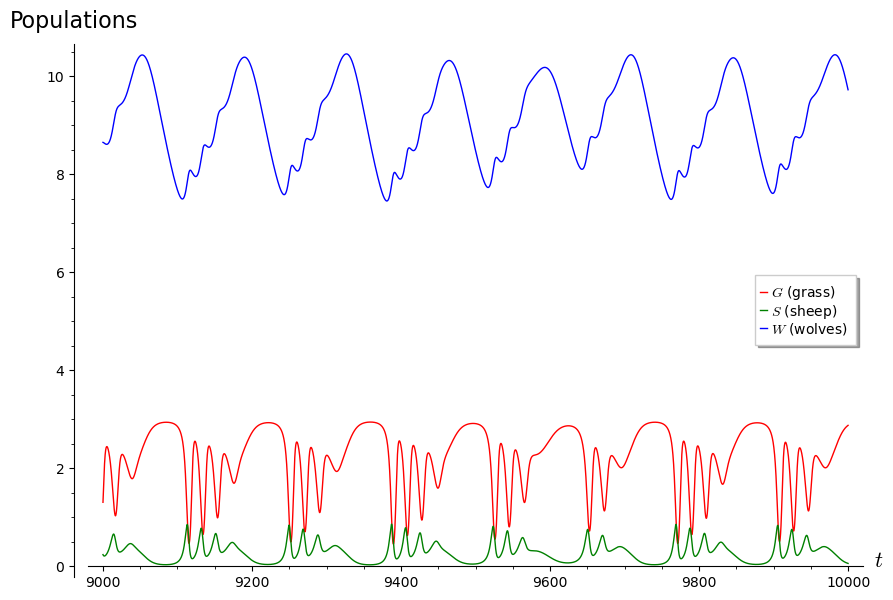

In [11]:
state_vars = list(var("G, S, W"))
system = (
    G*(1 - G/3) - 2.5*G/(1 + G)*S, 
    2/3*2.5*G/(1 + G)*S - 0.4*S - 0.1*S/(1 + S)*W, 
    0.5*0.1*S/(1 + S)*W - 0.01*W, 
)
field(G, S, W) = system
t_range = srange(0, 10000, 0.1)
solution = desolve_odeint(field, (1, 1, 1), t_range, state_vars)
solution = np.insert(solution, 0, t_range, axis=1)

start = int(9000/0.1)
p  = list_plot(solution[start:,(0,1)], plotjoined=True, color="red",   legend_label="$G$ (grass)")
p += list_plot(solution[start:,(0,2)], plotjoined=True, color="green", legend_label="$S$ (sheep)")
p += list_plot(solution[start:,(0,3)], plotjoined=True, color="blue",  legend_label="$W$ (wolves)")
p.show(ymin=0, axes_labels=("$t$", "Populations"), figsize=9)


In [13]:
start = int(6000/0.1)
fig = plotly.graph_objects.Figure()
fig.layout.width = 800
fig.layout.height = 700
fig.layout.showlegend = False
fig.layout.scene.aspectmode = 'cube'
fig.layout.scene.xaxis.title.text = "X (grass)"
fig.layout.scene.yaxis.title.text = "Y (sheep)"
fig.layout.scene.zaxis.title.text = "Z (wolves)"
fig.add_scatter3d(x=solution[start:,1], y=solution[start:,2], z=solution[start:,3], 
                  mode="lines", line_color="red")
fig.show()
